In [1]:
import tensorflow as tf
import numpy as np
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print(tf.__version__)

2.1.0


In [2]:
with open('C:\\Users\\HP\\Sarcasm_Headlines_Dataset_v2.json') as file:
    datastore=json.load(file)

In [3]:
training_size= 20000
vocab_size=1000
max_size=120
padding_type="post"
truncating_type="post"
embedding_dim=16


sentences=[]
labels=[]

for data in datastore:
    sentences.append(data['headline'])
    labels.append(data['is_sarcastic'])
    
training_sentences=sentences[0:training_size]
training_labels=labels[0:training_size]
testing_sentences=sentences[training_size:]
testing_labels=labels[training_size:]


In [4]:
tokenizer=Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padding=pad_sequences(training_sequences, maxlen=max_size, padding=padding_type, truncating=truncating_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padding=pad_sequences(testing_sequences, maxlen=max_size, padding=padding_type, truncating=truncating_type)


In [5]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_size),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(24, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 27,185
Trainable params: 27,185
Non-trainable params: 0
_________________________________________________________________


In [6]:
training_padding=np.array(training_padding)
training_labels=np.array(training_labels)
testing_padding-np.array(testing_padding)
testing_labels=np.array(testing_labels)
num_epochs=20

history=model.fit(training_padding, training_labels, epochs=num_epochs, validation_data=(testing_padding,testing_labels), verbose=1)


Train on 20000 samples, validate on 6709 samples
Epoch 1/20
20000/20000 [==============================] - 11s 542us/sample - loss: 0.4445 - acc: 0.7768 - val_loss: 0.3971 - val_acc: 0.8125
Epoch 2/20
20000/20000 [==============================] - 7s 369us/sample - loss: 0.3582 - acc: 0.8343 - val_loss: 0.3783 - val_acc: 0.8241
Epoch 3/20
20000/20000 [==============================] - 7s 357us/sample - loss: 0.3320 - acc: 0.8492 - val_loss: 0.3802 - val_acc: 0.8216
Epoch 4/20
20000/20000 [==============================] - 7s 366us/sample - loss: 0.3170 - acc: 0.8569 - val_loss: 0.3909 - val_acc: 0.8258
Epoch 5/20
20000/20000 [==============================] - 7s 363us/sample - loss: 0.3069 - acc: 0.8594 - val_loss: 0.3767 - val_acc: 0.8296
Epoch 6/20
20000/20000 [==============================] - 7s 373us/sample - loss: 0.2980 - acc: 0.8672 - val_loss: 0.3721 - val_acc: 0.8281
Epoch 7/20
20000/20000 [==============================] - 8s 382us/sample - loss: 0.2842 - acc: 0.8737 - val_l

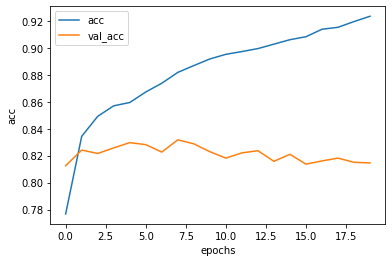

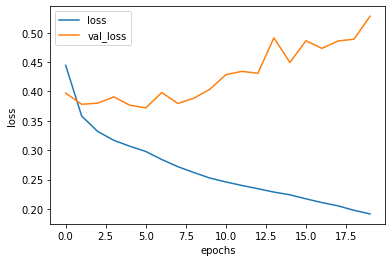

In [9]:
import matplotlib.pyplot as plt

def show_plot(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string,"val_" + string])
    plt.show()
    
show_plot(history,"acc")  
show_plot(history,"loss")
             